In [ ]:
import pandas as pd

# Analyse des données historiques du marché immobilier parisien

## Introduction
Cette analyse vise à explorer les données historiques du marché immobilier parisien entre 2017 et 2021. Nous allons examiner les tendances des prix, l'influence du type de bien et de la localisation, ainsi que les relations entre les différentes variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the historical real estate data
file_path = 'C:\\Users\\pc\\OneDrive\\Documents\\projet n 8\\historique_immobilier_paris_2017_2021_vdef2.xlsx'
historique_data = pd.read_excel(file_path)
historique_data.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


## Statistiques descriptives
Nous commençons par examiner les statistiques descriptives pour obtenir une vue d'ensemble des données.

In [4]:
historique_data.describe(include='all', datetime_is_numeric=True)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
count,26196,2.619600e+04,26196.000000,26196,26196.000000,26196,26196.000000,26196,26196.000000
unique,NaN,NaN,NaN,2874,NaN,20,NaN,2,NaN
top,NaN,NaN,NaN,RUE DE VAUGIRARD,NaN,Paris 18e Arrondissement,NaN,Appartement,NaN
freq,NaN,NaN,NaN,137,NaN,2925,NaN,24353,NaN
mean,2019-06-09 14:09:14.099862784,4.916170e+05,47.449572,NaN,75012.716216,NaN,2.140709,NaN,46.859940
min,2017-01-02 00:00:00,8.519470e+04,1.000000,NaN,75001.000000,NaN,2.000000,NaN,11.000000
25%,2018-03-14 00:00:00,2.339439e+05,10.000000,NaN,75009.000000,NaN,2.000000,NaN,23.000000
50%,2019-05-23 00:00:00,3.545774e+05,27.000000,NaN,75014.000000,NaN,2.000000,NaN,35.000000
75%,2020-09-16 00:00:00,5.702197e+05,63.000000,NaN,75017.000000,NaN,2.000000,NaN,55.000000
max,2021-12-31 00:00:00,3.843359e+07,407.000000,NaN,75020.000000,NaN,4.000000,NaN,3945.000000


## Analyse des tendances des prix
Nous allons maintenant étudier comment les prix immobiliers ont évolué au fil du temps.

C:\Users\pc\AppData\Local\Temp\ipykernel_18124\3168675477.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = historique_data.groupby(historique_data['date_mutation'].dt.to_period('M')).mean()


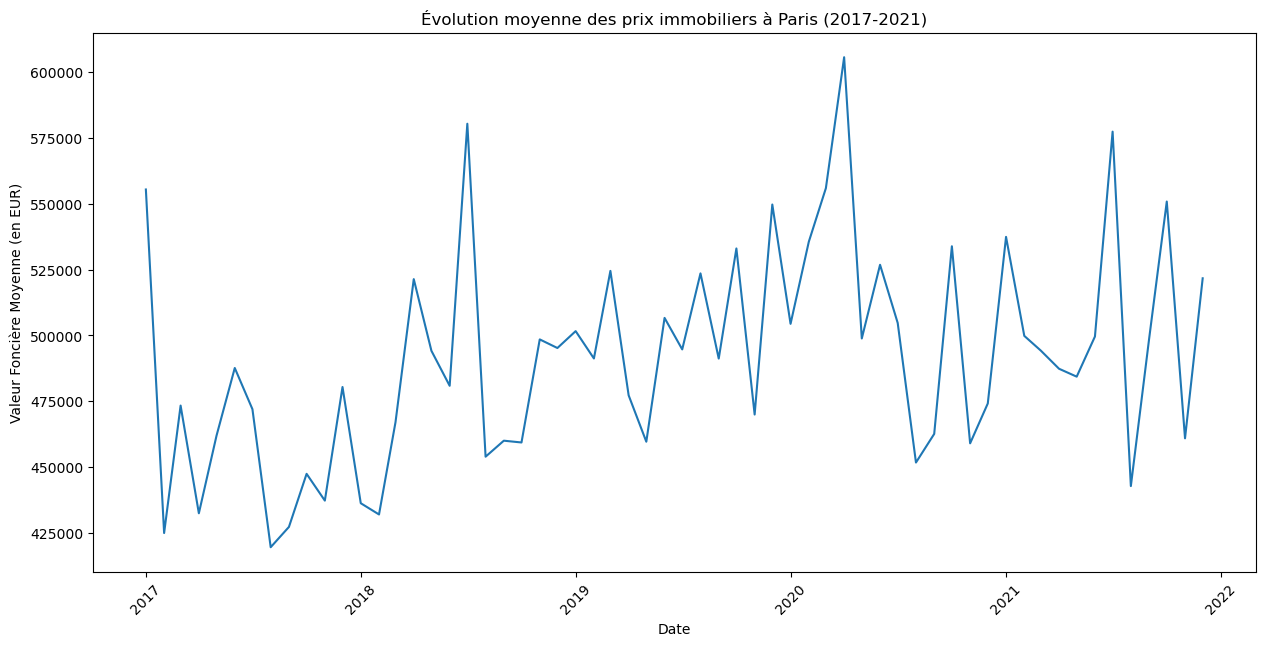

In [5]:
# Grouping the data by the mutation date and calculating the average value fonciere
grouped_data = historique_data.groupby(historique_data['date_mutation'].dt.to_period('M')).mean()
# Resetting index to convert the PeriodIndex to DateTimeIndex for plotting
grouped_data.reset_index(inplace=True)
grouped_data['date_mutation'] = grouped_data['date_mutation'].dt.to_timestamp()
# Plotting the average value fonciere over time
plt.figure(figsize=(15, 7))
sns.lineplot(x='date_mutation', y='valeur_fonciere', data=grouped_data)
plt.title('Évolution moyenne des prix immobiliers à Paris (2017-2021)')
plt.xlabel('Date')
plt.ylabel('Valeur Foncière Moyenne (en EUR)')
plt.xticks(rotation=45)
plt.show()

## Analyse de l'impact du type de bien et de la localisation sur les prix
Dans cette section, nous examinerons comment différents types de biens et la localisation (arrondissements de Paris) affectent les prix immobiliers.

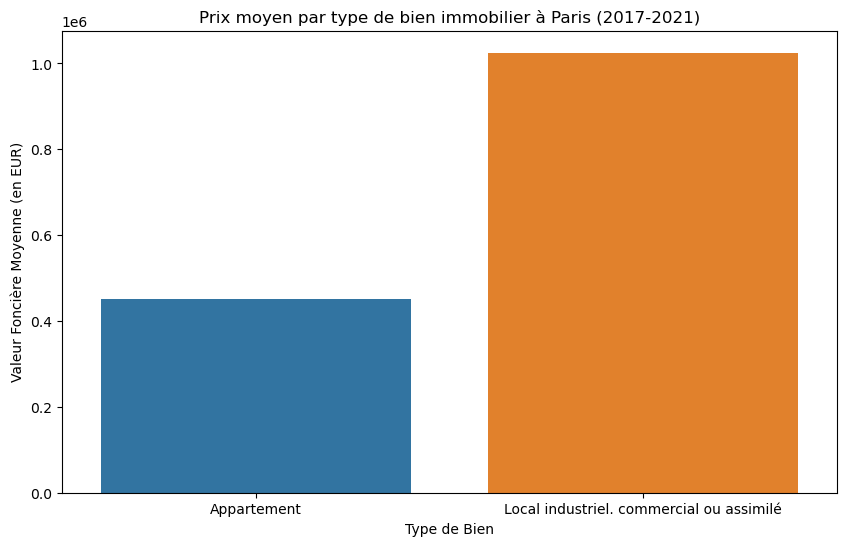

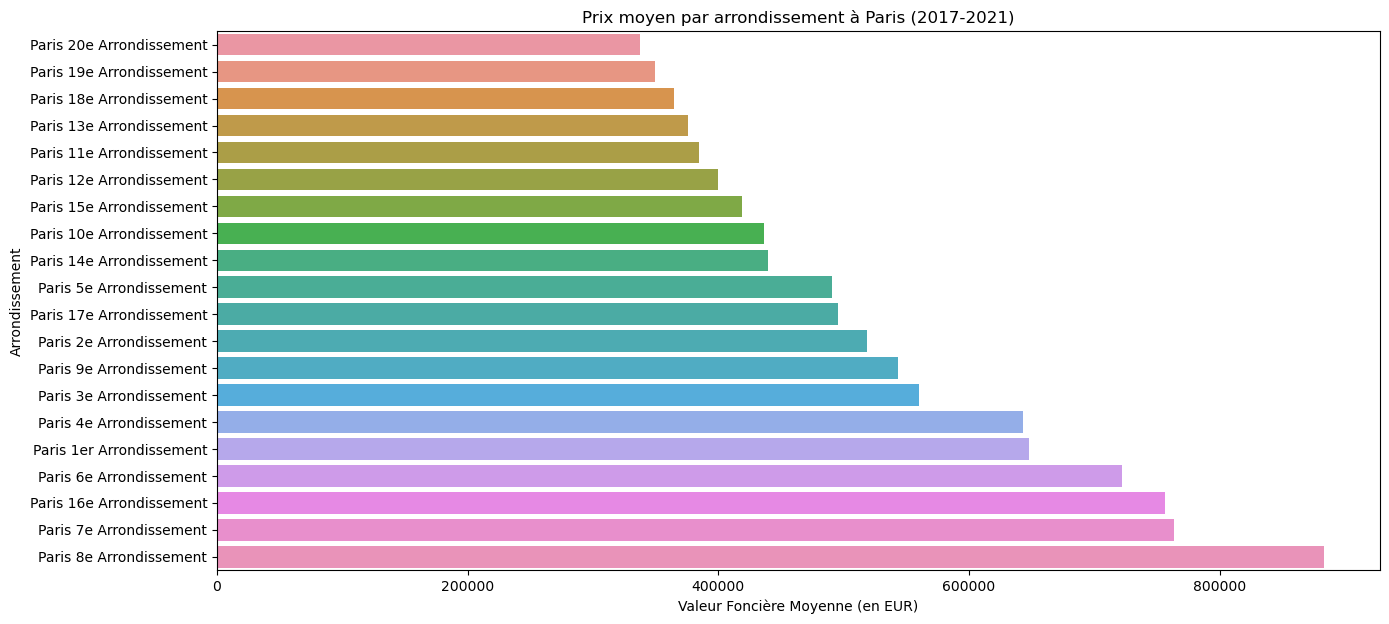

In [6]:
# Analyzing the impact of property type on the prices
type_price_data = historique_data.groupby('type_local')['valeur_fonciere'].mean().reset_index()
# Plotting the average value fonciere by property type
plt.figure(figsize=(10, 6))
sns.barplot(x='type_local', y='valeur_fonciere', data=type_price_data)
plt.title('Prix moyen par type de bien immobilier à Paris (2017-2021)')
plt.xlabel('Type de Bien')
plt.ylabel('Valeur Foncière Moyenne (en EUR)')
plt.show()
# Analyzing the impact of location (Parisian arrondissements) on the prices
arrondissement_price_data = historique_data.groupby('nom_commune')['valeur_fonciere'].mean().sort_values().reset_index()
# Plotting the average value fonciere by arrondissement
plt.figure(figsize=(15, 7))
sns.barplot(x='valeur_fonciere', y='nom_commune', data=arrondissement_price_data)
plt.title('Prix moyen par arrondissement à Paris (2017-2021)')
plt.xlabel('Valeur Foncière Moyenne (en EUR)')
plt.ylabel('Arrondissement')
plt.show()

## Analyse des corrélations
Nous allons maintenant examiner les corrélations entre différentes variables pour identifier les facteurs les plus importants.

C:\Users\pc\AppData\Local\Temp\ipykernel_18124\1136189660.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = historique_data.corr()


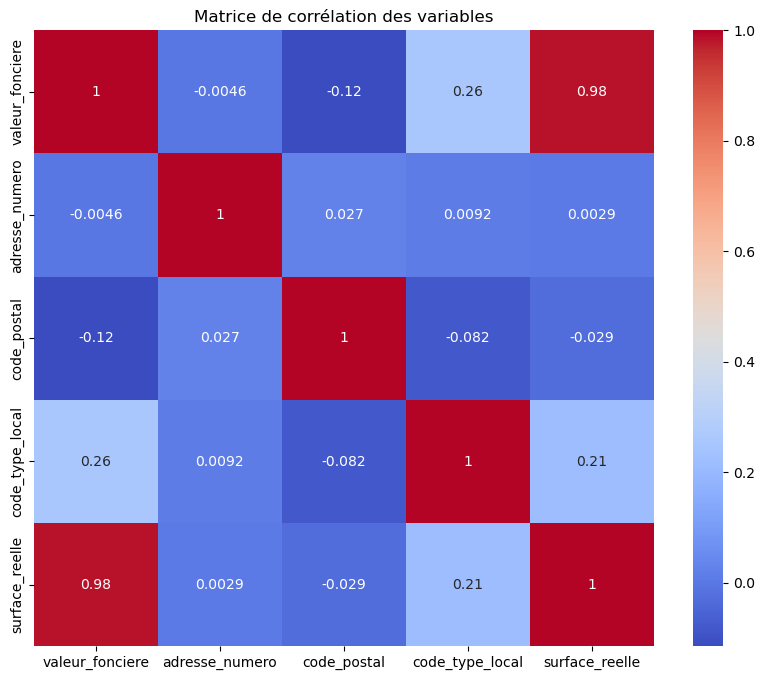

In [7]:
# Correlation matrix
correlation_matrix = historique_data.corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables')
plt.show()

## Entraînement d'un algorithme de régression linéaire
Dans cette section, nous allons préparer les données pour la modélisation, entraîner un modèle de régression linéaire et évaluer sa performance.

In [15]:
# Préparation des données pour le modèle de régression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sélection des variables pertinentes et suppression des valeurs manquantes
regression_data = historique_data[['valeur_fonciere', 'surface_reelle', 'code_postal']].dropna()

# Séparation des variables indépendantes (X) et de la variable dépendante (y)
X = regression_data[['surface_reelle', 'code_postal']]
y = regression_data['valeur_fonciere']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entraînement du modèle de régression linéaire
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = regressor.predict(X_test)

# Évaluation de la performance du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
'MSE: {:.2f}, R²: {:.2f}'.format(mse, r2)

'MSE: 5044188833.46, R²: 0.98'

In [33]:

# Préparation des données
new_data_prepared = historique_data[['surface_reelle', 'code_postal']].dropna()

# Ajout des prédictions au DataFrame original
historique_data['valeur_fonciere_predite'] = new_predictions

# Affichage des premières lignes du DataFrame avec les prédictions
print(historique_data[['surface_reelle', 'code_postal', 'valeur_fonciere_predite']].head())



   surface_reelle  code_postal  valeur_fonciere_predite
0              50        75003             6.172560e+05
1             163        75008             1.774854e+06
2              66        75008             7.405440e+05
3              22        75003             3.186922e+05
4              15        75001             2.629792e+05


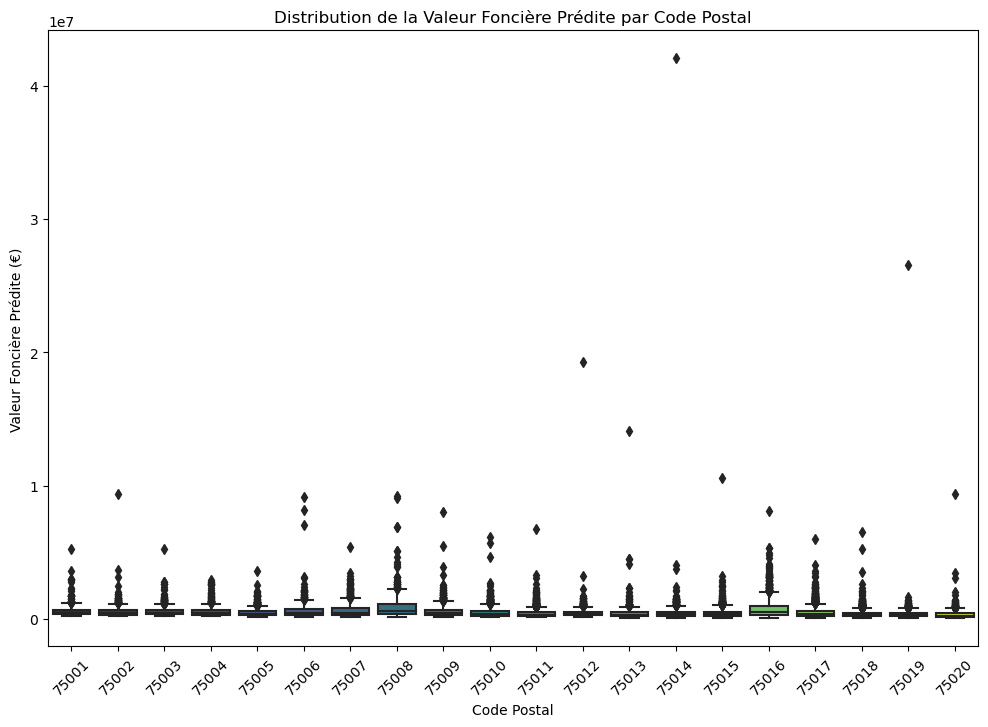

In [37]:
# Création de la variable visualization_data à partir de new_data
visualization_data = historique_data[['surface_reelle', 'code_postal', 'valeur_fonciere_predite']]

# Maintenant, vous pouvez utiliser visualization_data pour la visualisation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=visualization_data, x='code_postal', y='valeur_fonciere_predite', palette='viridis')

plt.title('Distribution de la Valeur Foncière Prédite par Code Postal')
plt.xlabel('Code Postal')
plt.ylabel('Valeur Foncière Prédite (€)')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

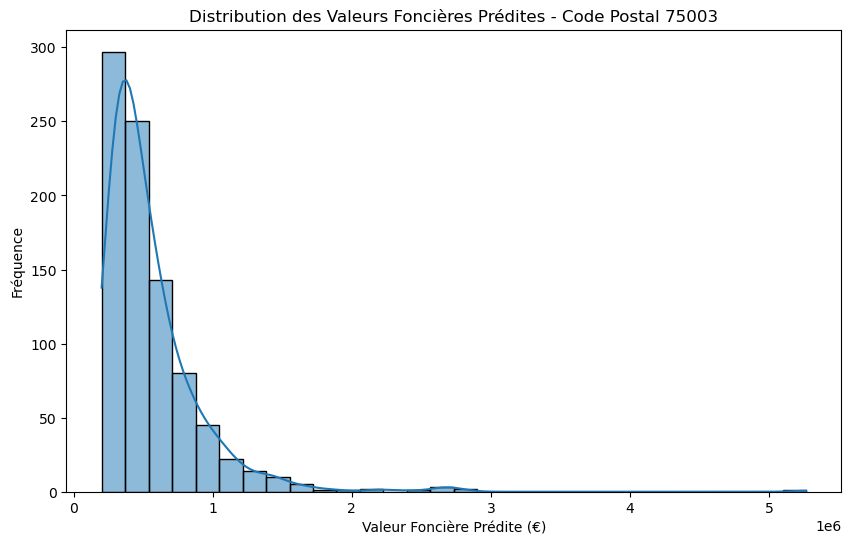

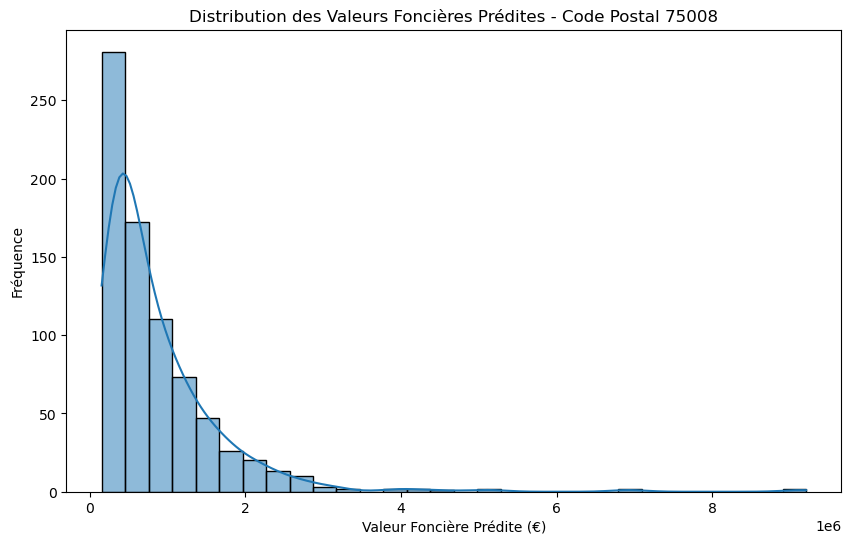

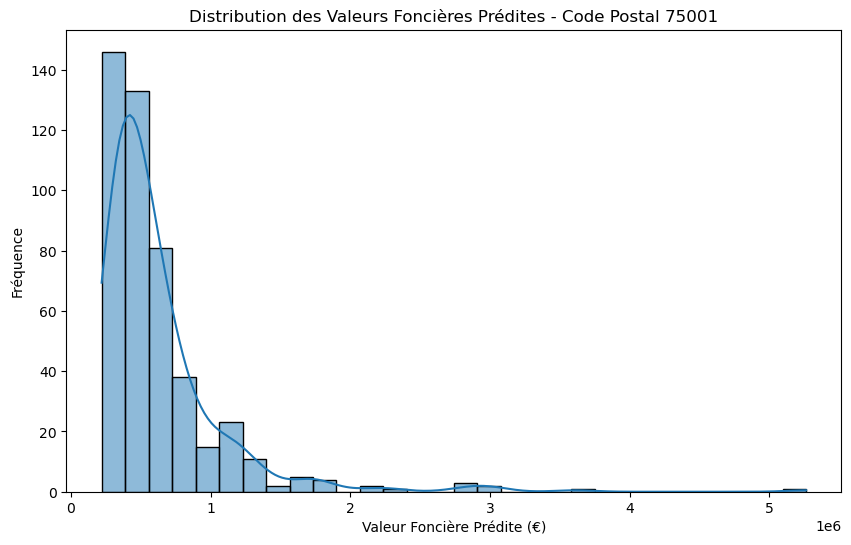

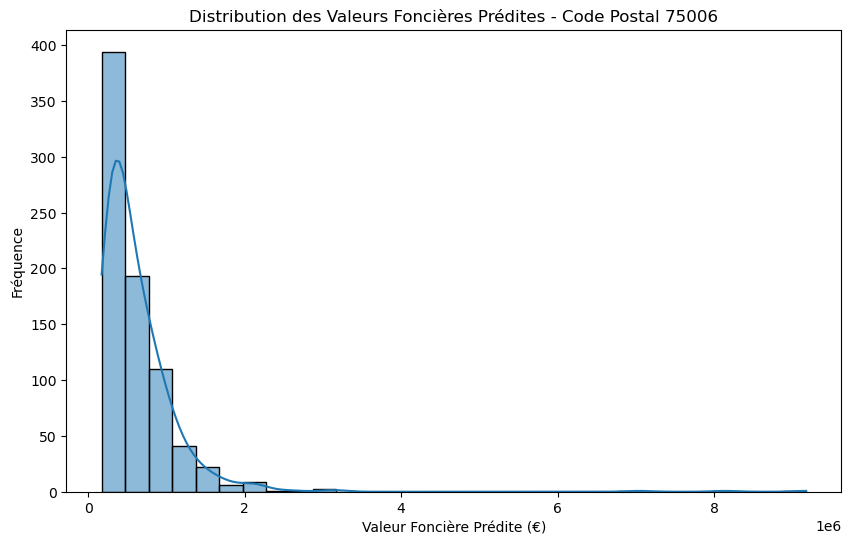

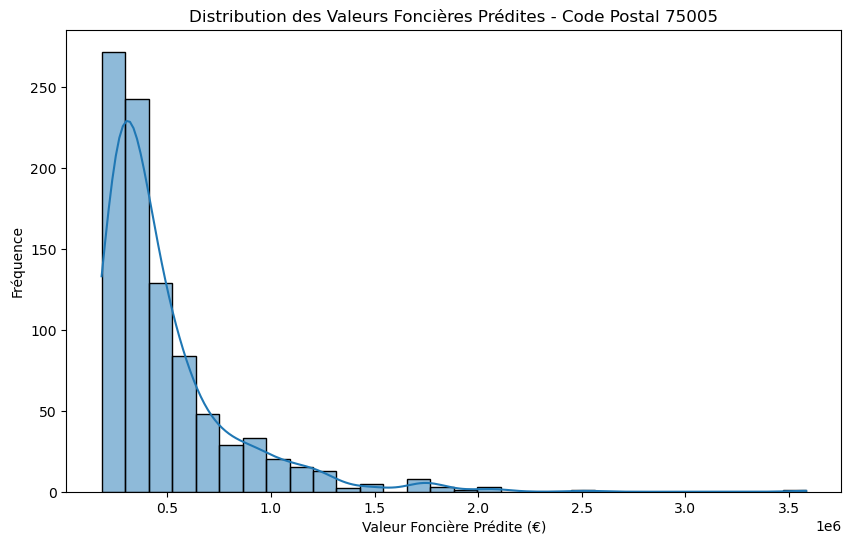

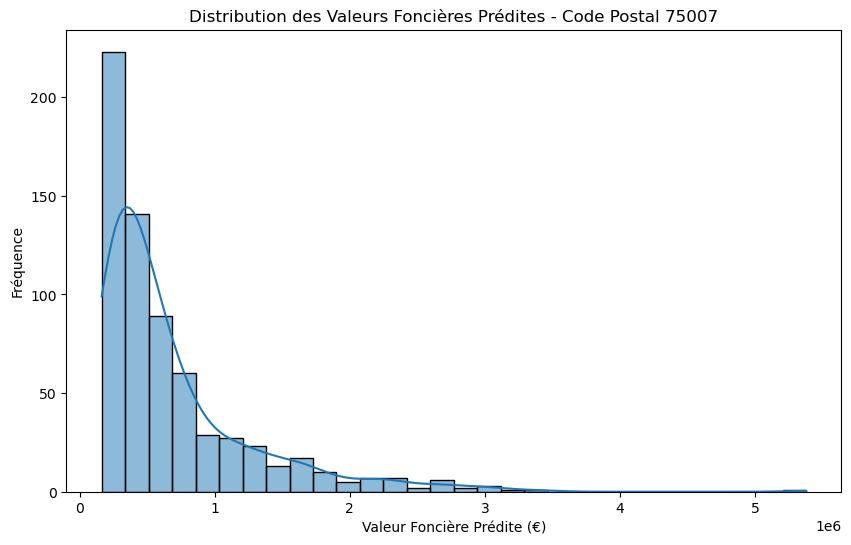

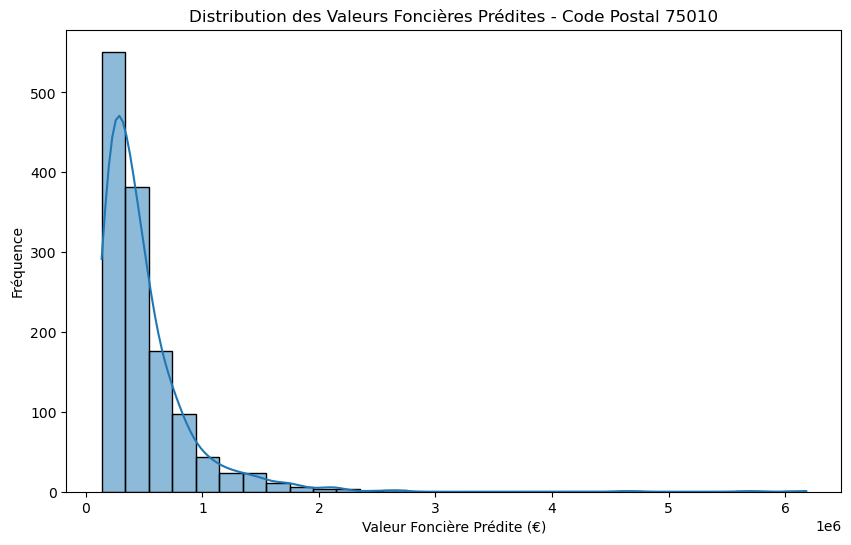

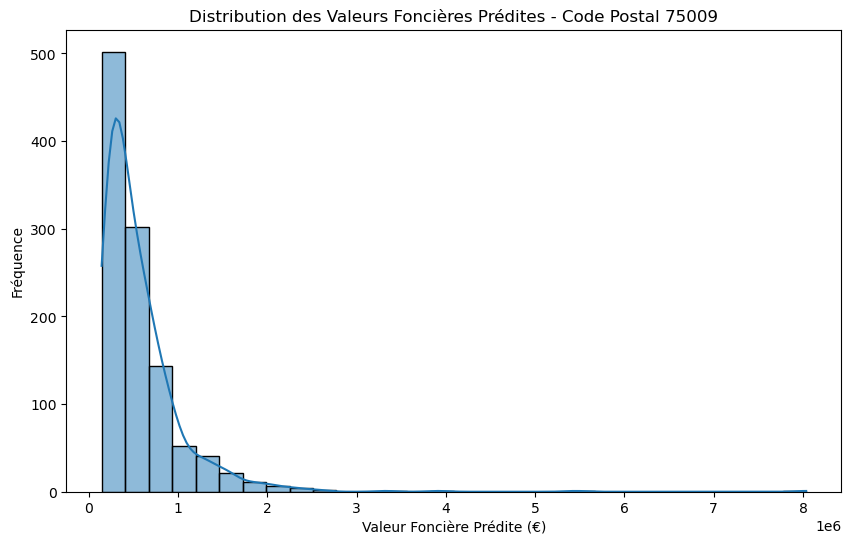

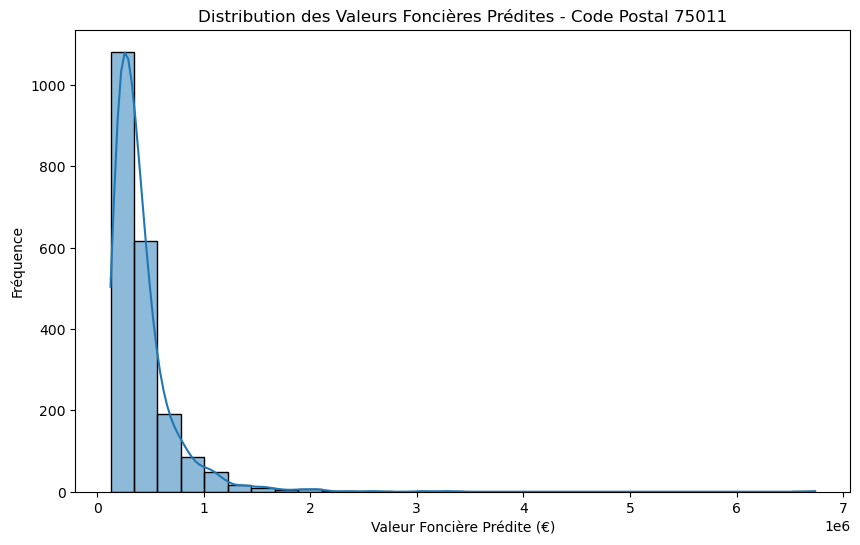

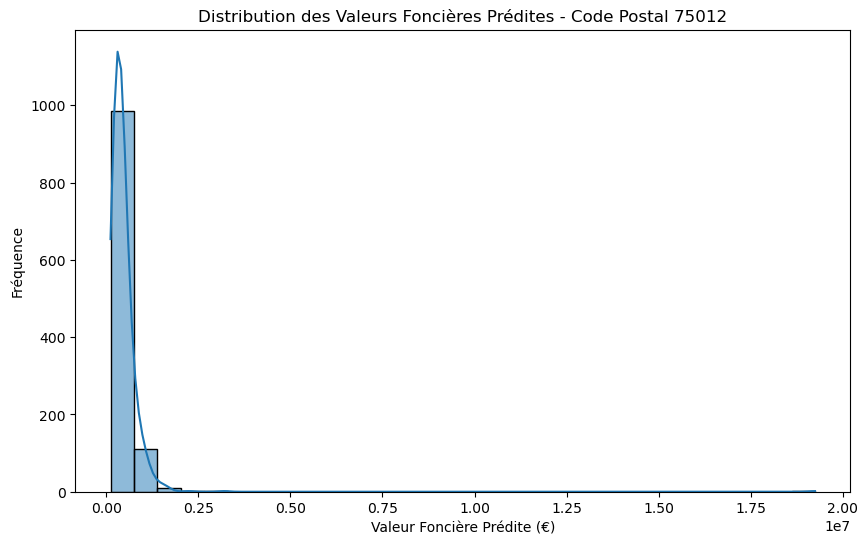

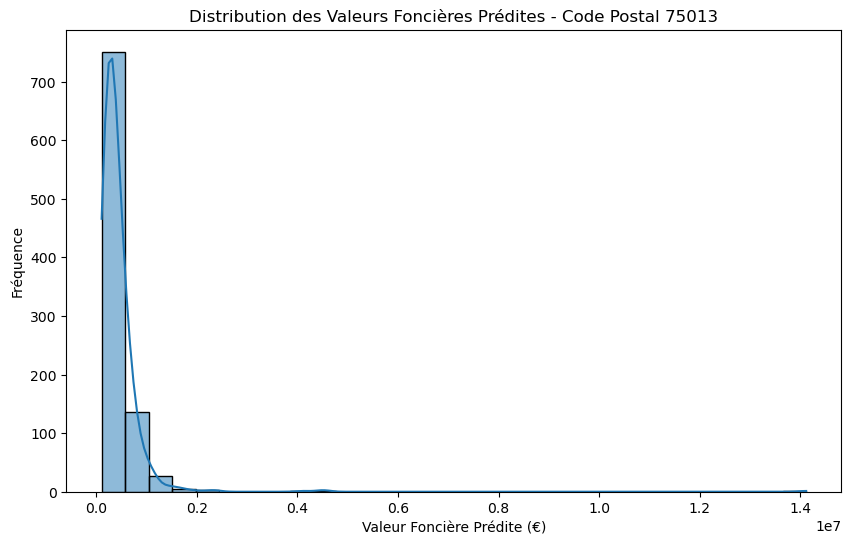

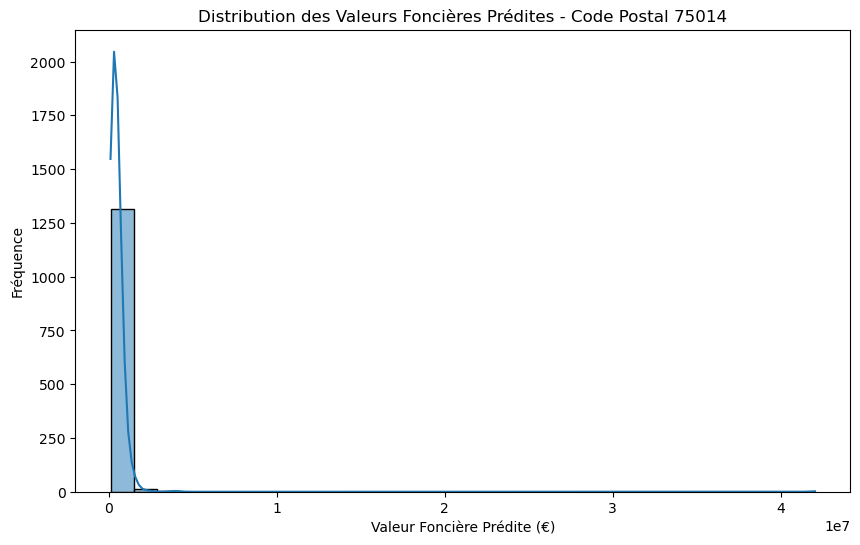

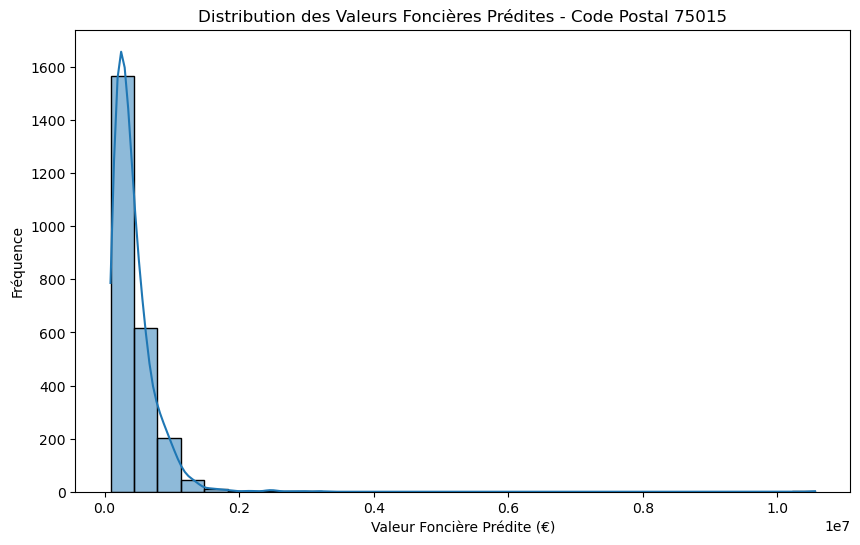

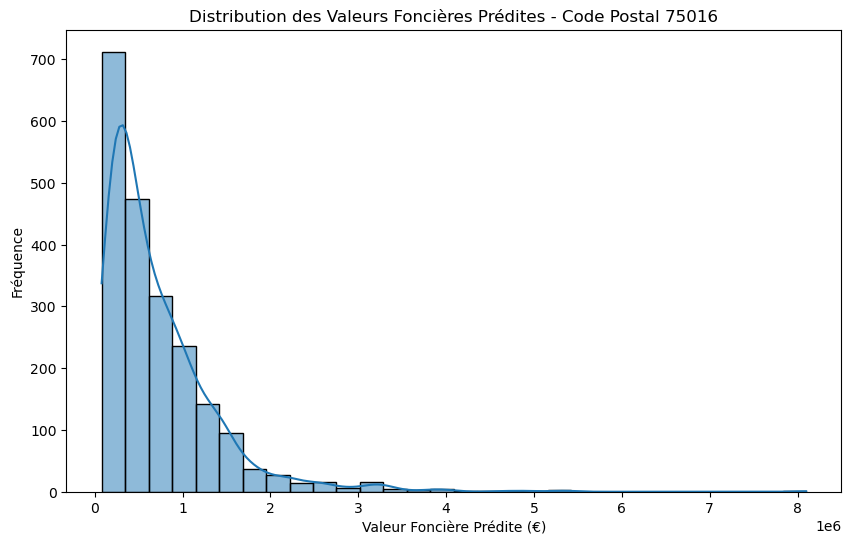

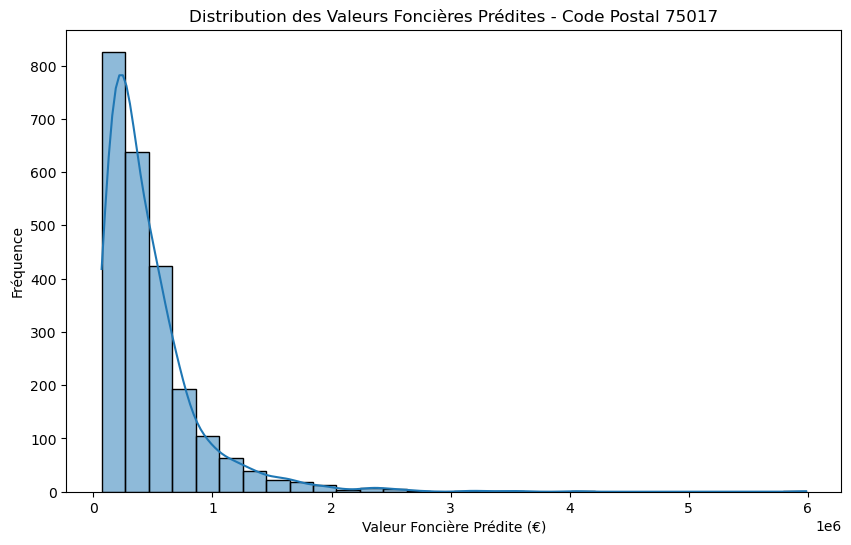

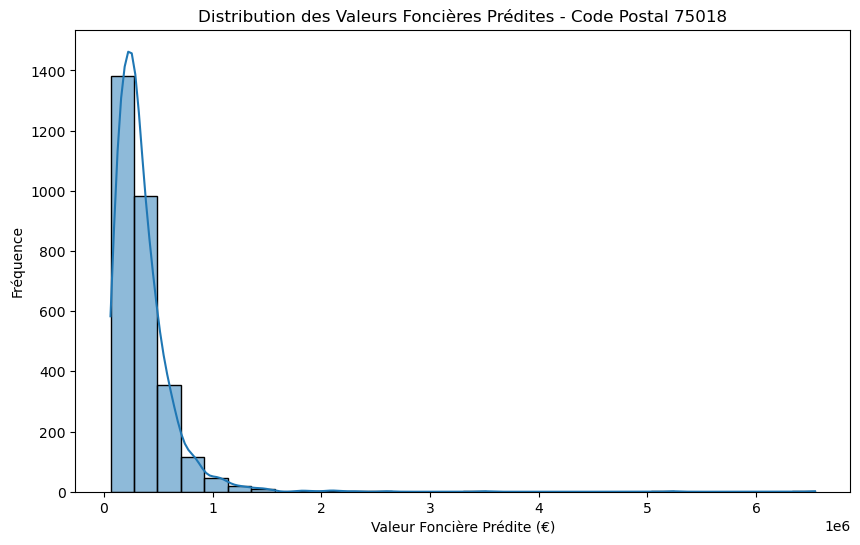

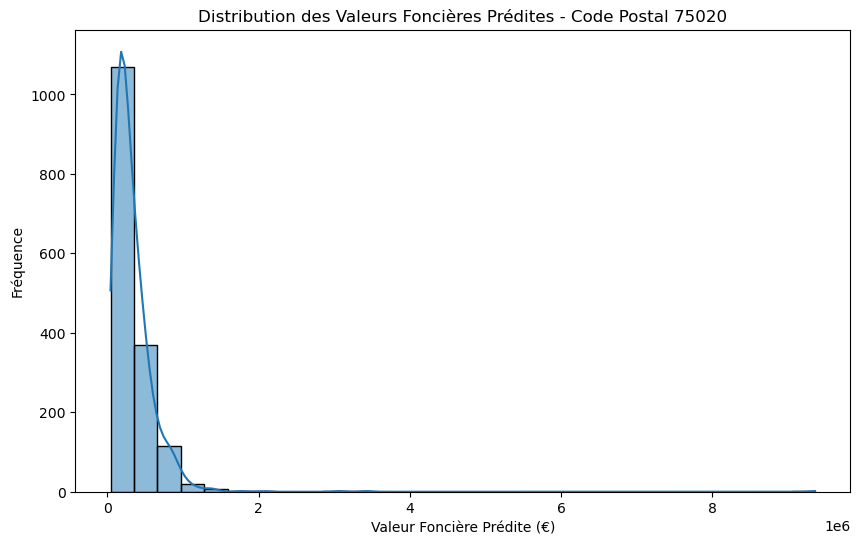

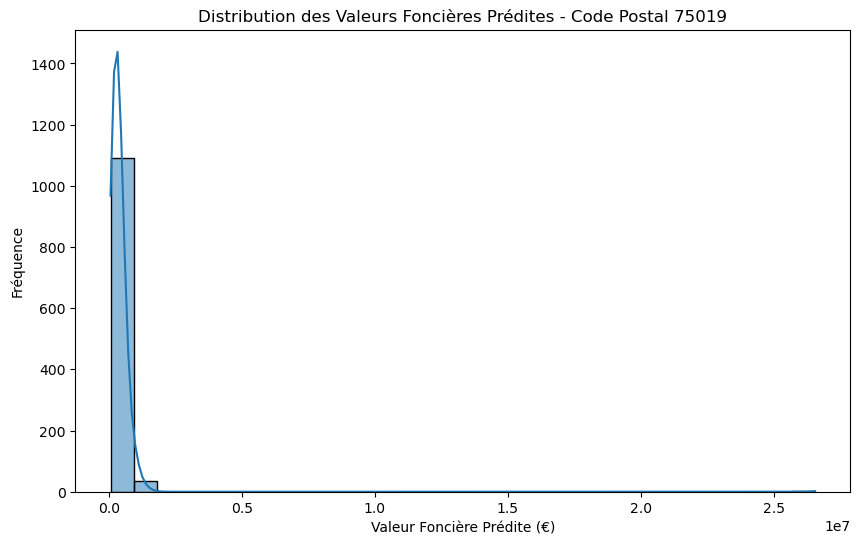

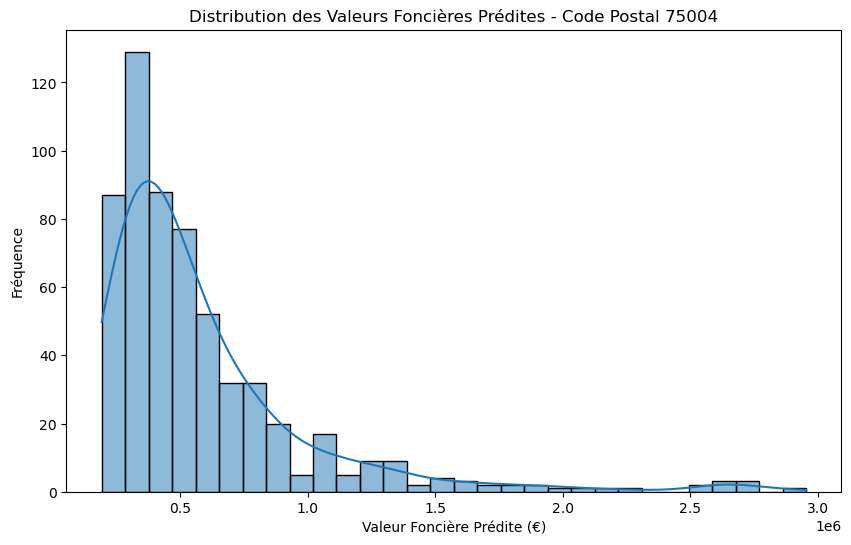

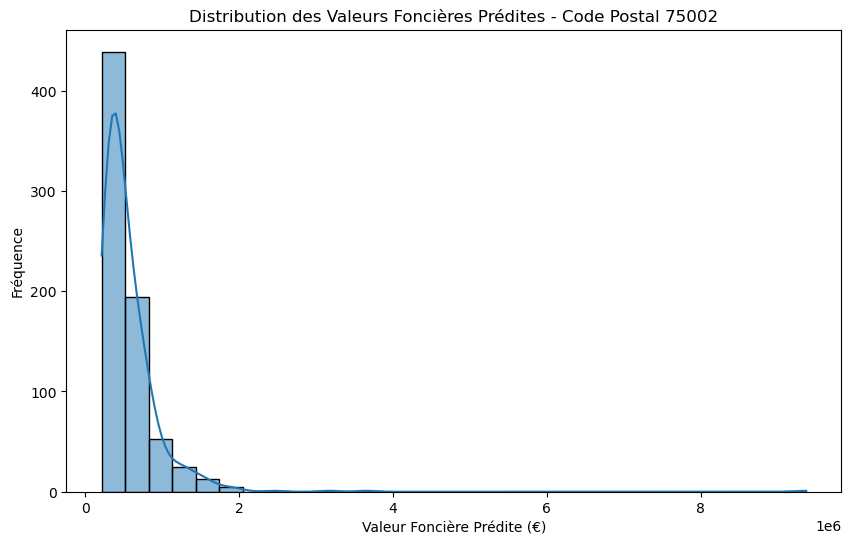

In [38]:
# Obtention des codes postaux uniques
unique_postal_codes = visualization_data['code_postal'].unique()

# Création d'un histogramme pour chaque code postal
for postal_code in unique_postal_codes:
    subset = visualization_data[visualization_data['code_postal'] == postal_code]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(subset['valeur_fonciere_predite'], kde=True, bins=30)
    
    plt.title(f'Distribution des Valeurs Foncières Prédites - Code Postal {postal_code}')
    plt.xlabel('Valeur Foncière Prédite (€)')
    plt.ylabel('Fréquence')
    plt.show()

In [16]:

# Chargement des données
portfolio_file_path = 'C:\\Users\\pc\\OneDrive\\Documents\\projet n 8\\portefeuille_actifs+(3).xlsx'
portfolio_data = pd.read_excel(portfolio_file_path)

# Préparation des données pour la régression
# Utilisation de 'surface_reelle_bati' comme prédicteur
X_portfolio = portfolio_data[['surface_reelle_bati']]  # Prédicteur
y_portfolio = portfolio_data['surface_carrez']        # Cible (ici, surface carrez comme exemple)

# Division des données en ensembles d'entraînement et de test
X_train_portfolio, X_test_portfolio, y_train_portfolio, y_test_portfolio = train_test_split(X_portfolio, y_portfolio, test_size=0.2, random_state=42)

# Création et entraînement du modèle de régression linéaire
model_portfolio = LinearRegression()
model_portfolio.fit(X_train_portfolio, y_train_portfolio)

# Prédiction des valeurs pour l'ensemble de test
y_pred_portfolio = model_portfolio.predict(X_test_portfolio)

# Calcul de l'erreur quadratique moyenne et du coefficient de détermination (R²)
mse_portfolio = mean_squared_error(y_test_portfolio, y_pred_portfolio)
r2_portfolio = r2_score(y_test_portfolio, y_pred_portfolio)

# Affichage des résultats
model_coefficient_portfolio = model_portfolio.coef_[0]
model_intercept_portfolio = model_portfolio.intercept_
mse_portfolio, r2_portfolio, model_coefficient_portfolio, model_intercept_portfolio


(83.27339232660852, 0.937472428806704, 0.93903241673834, -2.6008966229588637)

In [17]:
# Affichage des résultats de manière structurée

# Affichage des coefficients du modèle
print("Coefficient de régression (pente) :", model_coefficient_portfolio)
print("Intercept (ordonnée à l'origine) :", model_intercept_portfolio)

# Affichage de la performance du modèle
print("\nPerformance du modèle :")
print("Erreur Quadratique Moyenne (MSE) :", mse_portfolio)
print("Coefficient de Détermination (R²) :", r2_portfolio)


Coefficient de régression (pente) : 0.93903241673834
Intercept (ordonnée à l'origine) : -2.6008966229588637

Performance du modèle :
Erreur Quadratique Moyenne (MSE) : 83.27339232660852
Coefficient de Détermination (R²) : 0.937472428806704


## Prédiction de la valorisation future du portefeuille
Utilisation du modèle de régression pour estimer la valeur des biens immobiliers dans le portefeuille de l'entreprise, et analyse comparative entre les segments 'particuliers' et 'corporate'.

In [34]:


# Prédiction des valeurs foncières du portefeuille
# Sélection des variables pertinentes (en supposant que les mêmes variables soient utilisées que pour l'entraînement du modèle)
portefeuille_features = portefeuille_data[['surface_reelle_bati', 'code_postal']]
portefeuille_pred = regressor.predict(portefeuille_features)

# Ajout des prédictions au dataframe du portefeuille
portefeuille_data['valeur_fonciere_predite'] = portefeuille_pred

# Analyse comparative des valorisations entre les segments 'particuliers' et 'corporate'
# (Cette partie dépendra de la manière dont les segments sont identifiés dans les données)
# Exemple de code, à ajuster selon les données spécifiques
segment_analysis = portefeuille_data.groupby('segment')['valeur_fonciere_predite'].mean()
segment_analysis

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- surface_reelle_bati
Feature names seen at fit time, yet now missing:
- surface_reelle


In [22]:
portefeuille_data['segment'] = portefeuille_data['type_local'].apply(lambda x: 'particuliers' if x == 'Appartement' else 'corporate')

# Continuation du code pour la prédiction et l'analyse
X_portefeuille = portefeuille_data[['surface_reelle_bati']]
predictions = model_portfolio.predict(X_portefeuille)
portefeuille_data['valeur_predite'] = predictions

# Analyse comparative des valorisations entre les segments
segment_analysis = portefeuille_data.groupby('segment')['valeur_predite'].mean()

# Affichage des résultats
print("Analyse des Valorisation Moyennes par Segment :")
print(segment_analysis)


Analyse des Valorisation Moyennes par Segment :
segment
corporate       57.124669
particuliers    35.728699
Name: valeur_predite, dtype: float64


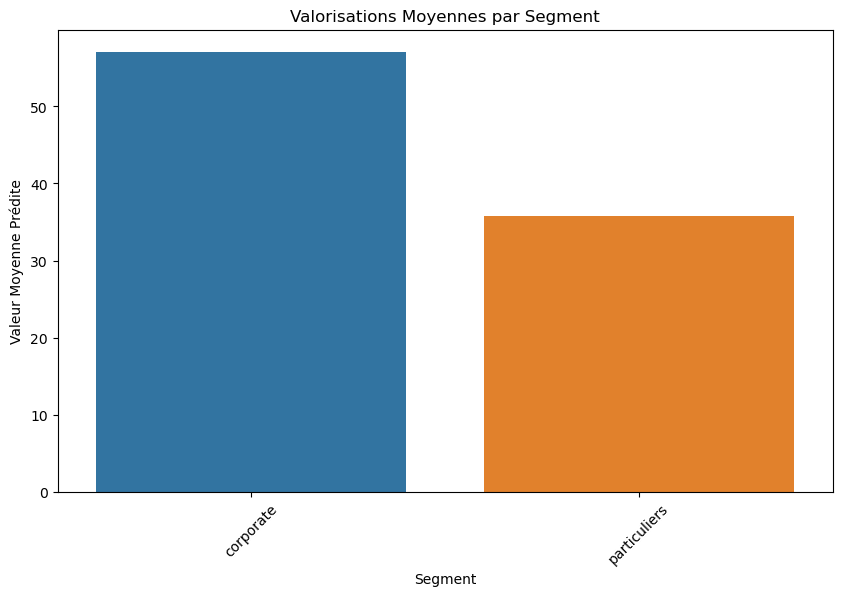

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un graphique à barres pour visualiser les valorisations moyennes par segment
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_analysis.index, y=segment_analysis.values)

plt.title('Valorisations Moyennes par Segment')
plt.xlabel('Segment')
plt.ylabel('Valeur Moyenne Prédite')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()


## Classification non supervisée des biens immobiliers
Mise en œuvre d'une méthode de classification non supervisée pour regrouper les biens immobiliers et comparaison avec le classement existant.

In [20]:
# Importation de l'algorithme de clustering
from sklearn.cluster import KMeans

# Préparation des données pour la classification
# Sélection des variables pertinentes (par exemple, surface, localisation)
classification_data = portefeuille_data[['surface_reelle_bati', 'code_postal']]

# Application de l'algorithme de clustering K-means
kmeans = KMeans(n_clusters=3, random_state=0)  # Le nombre de clusters est à choisir
portefeuille_data['cluster'] = kmeans.fit_predict(classification_data)

# Analyse des clusters créés
# (Exemple de visualisation et d'analyse, à adapter en fonction des besoins spécifiques)
cluster_analysis = portefeuille_data.groupby('cluster')['surface_reelle_bati', 'code_postal'].mean()
cluster_analysis

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pc\AppData\Local\Temp\ipykernel_18124\2268591799.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_analysis = portefeuille_data.groupby('cluster')['surface_reelle_bati', 'code_postal'].mean()


,surface_reelle_bati,code_postal
cluster,,
0,33.597156,75012.611374
1,207.777778,75009.111111
2,91.327273,75012.254545


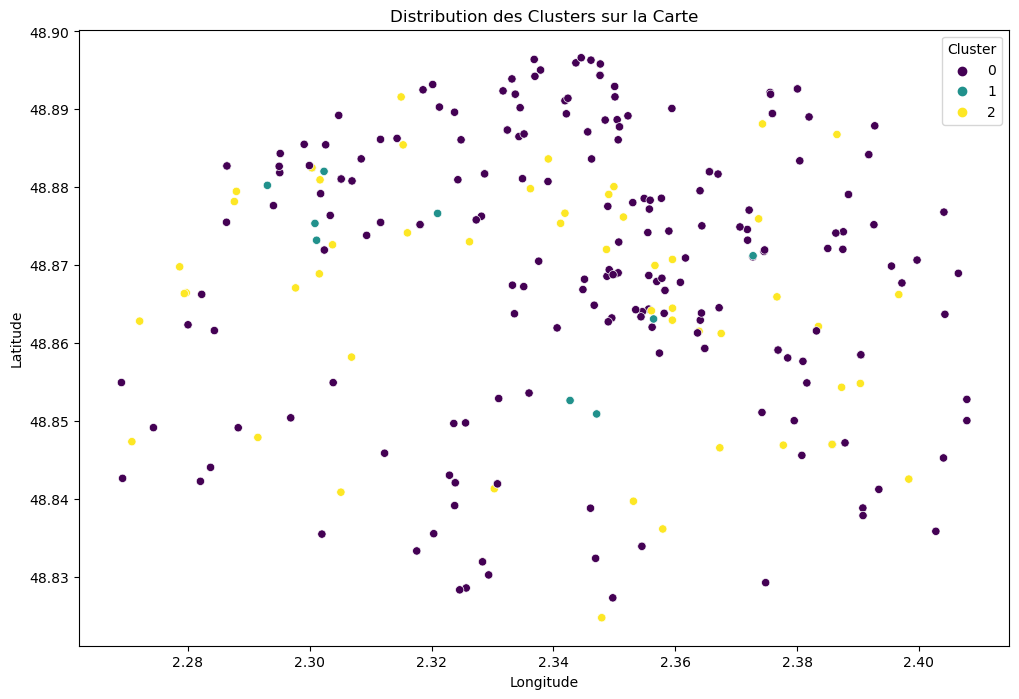

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifiez que votre DataFrame 'portefeuille_data' contient des colonnes 'longitude' et 'latitude'
plt.figure(figsize=(12, 8))

# Scatter plot avec longitude et latitude, coloré par cluster
sns.scatterplot(x='longitude', y='latitude', hue='cluster', palette='viridis', data=portefeuille_data)

plt.title('Distribution des Clusters sur la Carte')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


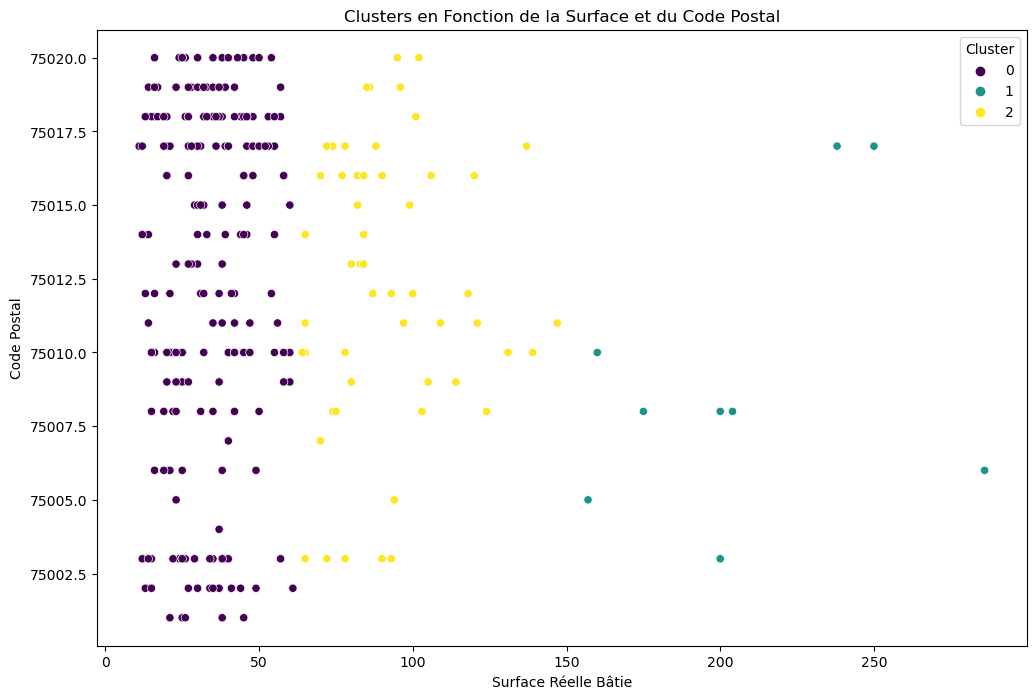

In [25]:
plt.figure(figsize=(12, 8))

# Scatter plot avec surface_reelle_bati et code_postal
sns.scatterplot(x='surface_reelle_bati', y='code_postal', hue='cluster', palette='viridis', data=portefeuille_data)

plt.title('Clusters en Fonction de la Surface et du Code Postal')
plt.xlabel('Surface Réelle Bâtie')
plt.ylabel('Code Postal')
plt.legend(title='Cluster')
plt.show()


Text(0.5, 1.02, 'Pair Plot des Clusters')

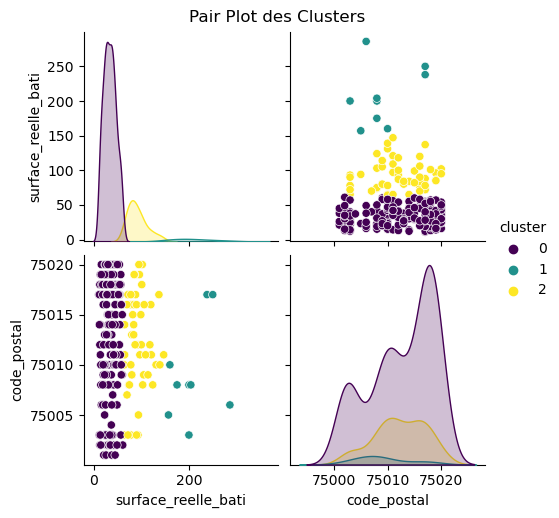

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection de quelques variables pour le pair plot
selected_variables = ['surface_reelle_bati', 'code_postal', 'cluster']
pair_plot_data = portefeuille_data[selected_variables]

# Création d'un pair plot
sns.pairplot(pair_plot_data, hue='cluster', palette='viridis')
plt.suptitle('Pair Plot des Clusters', y=1.02)  # Ajout d'un titre et ajustement de la position


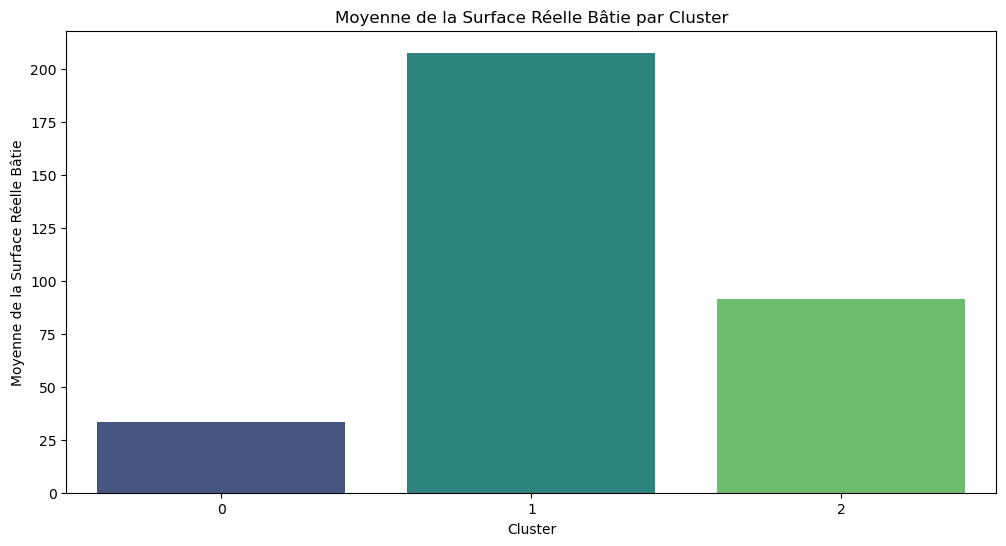

In [28]:
# Calcul de la moyenne de la surface réelle bâtie pour chaque cluster
mean_surface_by_cluster = portefeuille_data.groupby('cluster')['surface_reelle_bati'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='cluster', y='surface_reelle_bati', data=mean_surface_by_cluster, palette='viridis')
plt.title('Moyenne de la Surface Réelle Bâtie par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Moyenne de la Surface Réelle Bâtie')
plt.show()


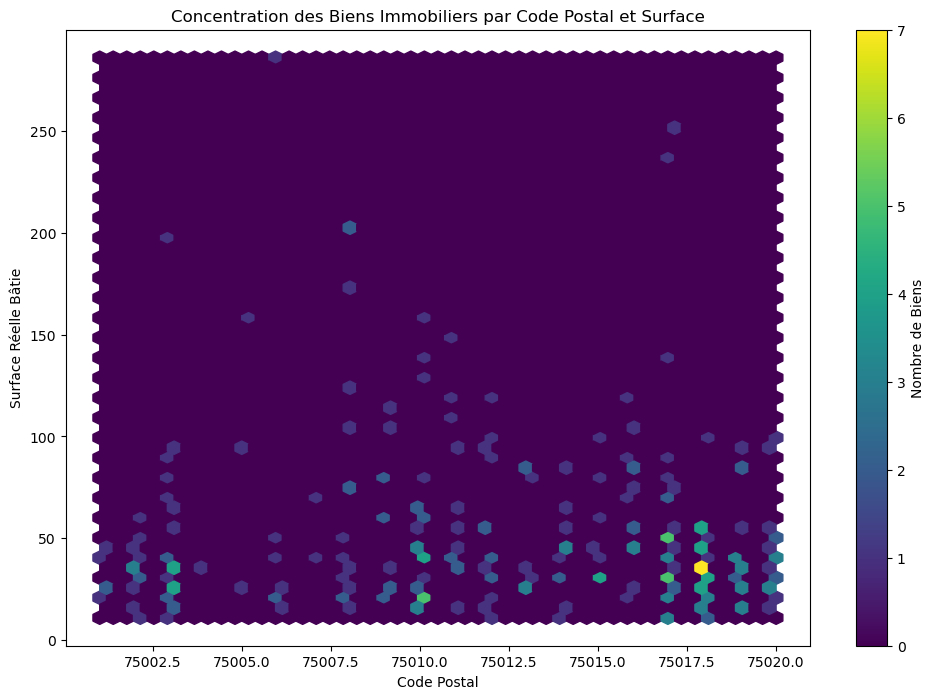

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.hexbin(portefeuille_data['code_postal'], portefeuille_data['surface_reelle_bati'], gridsize=50, cmap='viridis')
plt.colorbar(label='Nombre de Biens')
plt.title('Concentration des Biens Immobiliers par Code Postal et Surface')
plt.xlabel('Code Postal')
plt.ylabel('Surface Réelle Bâtie')
plt.show()


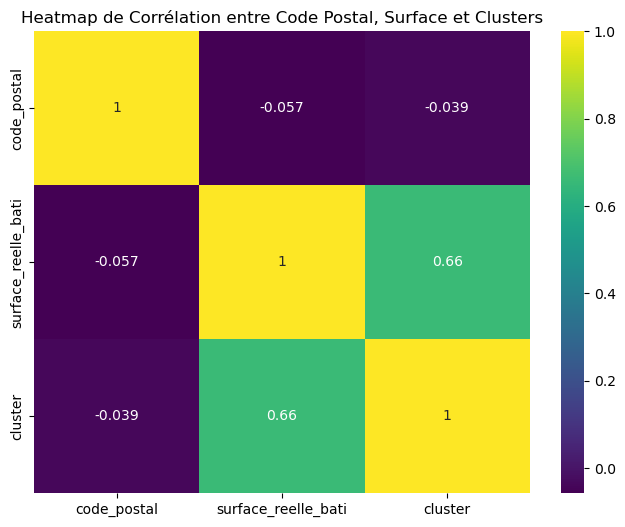

In [30]:
import seaborn as sns

# Calcul de la matrice de corrélation
correlation_matrix = portefeuille_data[['code_postal', 'surface_reelle_bati', 'cluster']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Heatmap de Corrélation entre Code Postal, Surface et Clusters')
plt.show()


## Nettoyage des Données

In [ ]:
# Code pour le nettoyage des données
# Exemple : Suppression des valeurs nulles ou aberrantes
data = data.dropna()
data = data[data['valeur_fonciere'] > 0]
# Ajoutez ici d'autres étapes de nettoyage selon vos besoins

## Exploration et Analyse des Données

In [ ]:
# Code pour l'exploration et l'analyse des données
# Exemple : Analyse de la distribution, des tendances, etc.

## Préparation des Données pour la Modélisation

In [ ]:
# Sélection des caractéristiques et préparation des données d'entrée et de sortie
X = data[['caracteristique1', 'caracteristique2']]
y = data['valeur_cible']

## Construction du Modèle de Régression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# Ajoutez d'autres paramètres au modèle si nécessaire

## Entraînement et Test du Modèle

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

## Prédiction et Évaluation des Résultats

In [ ]:
# Utilisez le modèle pour faire des prédictions et évaluer ses performances
# Exemple : Comparaison des prédictions avec les valeurs réelles, etc.